<p>
<font size='5' face='Georgia, Arial'>IIC2233 Apunte Programación Avanzada</font><br>
<font size='1'>&copy; 2024 Francisca Cattan.</font>
<br>
<font size='1'> Modificado 2025-2 por Equipo Docente IIC2233</font>
</p>

# Tabla de contenidos

1. [Análisis de datos con Pandas](#Análisis-de-datos-con-Pandas)
2. [Manipulación de DataFrames](#Manipulación-de-DataFrames)
    1. [Explorando el DataFrame](#Explorando-el-DataFrame)
    2. [Filtrado y selección de datos](#Filtrado-y-selección-de-datos)
3. [Modificación de estructura y datos](#Modificación-de-estructura-y-datos)
    1. [Visualización usando matplotlib](#Visualización-usando-matplotlib)
4. [Combinación de varios DataFrames](#Combinación-de-varios-Dataframes)
5. [Guardar y abrir datos como CSV](#Guardar-y-abrir-datos-como-CSV)

# Análisis de datos con Pandas

Nos adentraremos brevemente en el análisis de datos, utilizando la librería `Pandas`. Para mayor profundización luego de esta introducción, [recomendamos la documentación de `Pandas`](https://pandas.pydata.org/docs/index.html).

**¿Por qué Pandas?**

En el ámbito del análisis y la manipulación de datos, la capacidad de manejar grandes conjuntos de datos de manera eficiente y efectiva es crucial. `Pandas` es una biblioteca de Python esencial que proporciona estructuras de datos y herramientas de alto rendimiento diseñadas específicamente para facilitar estas tareas. A continuación nombraremos algunas ventajas de aprender esta herramienta.

- Estructuras de datos poderosas: Ofrece dos estructuras principales: *Series* (arreglos unidimensionales etiquetados) y *DataFrames* (estructuras bidimensionales similares a tablas de bases de datos o hojas de cálculo de Excel).

- Manipulación y limpieza de datos: Facilita operaciones como filtrado, selección, transformación y agregación de datos, lo que simplifica el proceso de preparación de datos para análisis posteriores.

- Soporte para múltiples formatos de datos: Permite leer y escribir datos en diversos formatos, como CSV, Excel, SQL, JSON, entre otros, facilitando la integración con diferentes fuentes de datos.

- Integración con otras bibliotecas: Se integra con bibliotecas como `NumPy`, `Matplotlib` (para visualizar datos) y `scikit-learn` (para realizar predicciones sobre los datos).

Es importante destacar que **`Pandas` está construido sobre `NumPy`**. Esto significa que utiliza arrays de `NumPy` internamente para almacenar y manipular los datos. Gracias a esta base, `¡¡¡Pandas` hereda muchas de las ventajas de `NumPy`!!!

# Antes de empezar...

Es necesario instalar las librerías que utilizaremos en este _notebook_, para esto debes correr los siguientes comandos en tu terminal:
```bash
python3 -m pip install pandas
python3 -m pip install matplotlib
```
Recuerda que si `python3` no funciona, probar con `python`, `py` o `py3`.

Al ejecutar los comandos `pip install` verás como se cargan las librerías necesarias o te informará que todo está en orden si es que ya cuentas con `Pandas` y `Matplotlib`.

# ¡Empecemos!

Para empezar debemos importar `pandas`, y lo haremos usando el alias `pd`. Al igual que en NumPy, este es un alias ampliamente usado.

In [1]:
import pandas as pd

# Manipulación de DataFrames

Para comenzar, vamos a crear un _DataFrame_ con información sobre algunas películas de Disney. Un **_DataFrame_** es una estructura de datos bidimensional similar a una hoja de cálculo o una tabla de SQL (contenido más avanzado).

**Datos de Ejemplo**
* Título: Nombre de la película.
* Año: Año de lanzamiento.
* Género: Género principal de la película.
* Duración: Duración de la película en minutos.
* Calificación: Calificación promedio en IMDb.

In [2]:
datos_peliculas = {
    'Título': ['Frozen', 'Toy Story', 'The Lion King', 'Moana', 'Coco'],
    'Año': [2013, 1995, 1994, 2016, 2017],
    'Género': ['Animación', 'Animación', 'Animación', 'Animación', 'Animación'],
    'Duración': [102, 81, 88, 107, 105],
    'Calificación': [7.4, 8.3, 8.5, 7.6, 8.4]
}

df_peliculas = pd.DataFrame(datos_peliculas)

Visualicemos este _DataFrame_ recién creado.

In [3]:
df_peliculas

,Título,Año,Género,Duración,Calificación
0,Frozen,2013,Animación,102,7.4
1,Toy Story,1995,Animación,81,8.3
2,The Lion King,1994,Animación,88,8.5
3,Moana,2016,Animación,107,7.6
4,Coco,2017,Animación,105,8.4


## Explorando el DataFrame


Podemos obtener información general sobre el _DataFrame_ utilizando el método `.info()`.

In [4]:
df_peliculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Título        5 non-null      object 
 1   Año           5 non-null      int64  
 2   Género        5 non-null      object 
 3   Duración      5 non-null      int64  
 4   Calificación  5 non-null      float64
dtypes: float64(1), int64(2), object(2)
memory usage: 332.0+ bytes


Muchas veces tenemos una cantidad enorme de datos, del orden de miles o millones. Para obtener una previsualizacion rapida podemos usar la funcion `.head` y ver las top 5 (por defecto) filas del dataset.

In [5]:
# Veremos las primeras dos
df_peliculas.head(2)

,Título,Año,Género,Duración,Calificación
0,Frozen,2013,Animación,102,7.4
1,Toy Story,1995,Animación,81,8.3


Para obtener algunas estadísticas descriptivas básicas de las columnas numéricas, podemos usar `.describe()` para datos discretos o `.value_counts` para datos categoricos.

In [6]:
df_peliculas.describe()

,Año,Duración,Calificación
count,5.000000,5.000000,5.000000
mean,2007.000000,96.600000,8.040000
std,11.510864,11.458621,0.502991
min,1994.000000,81.000000,7.400000
25%,1995.000000,88.000000,7.600000
50%,2013.000000,102.000000,8.300000
75%,2016.000000,105.000000,8.400000
max,2017.000000,107.000000,8.500000


In [7]:
df_peliculas.value_counts()

Título         Año   Género     Duración  Calificación
Coco           2017  Animación  105       8.4             1
Frozen         2013  Animación  102       7.4             1
Moana          2016  Animación  107       7.6             1
The Lion King  1994  Animación  88        8.5             1
Toy Story      1995  Animación  81        8.3             1
Name: count, dtype: int64

Podemos acceder a una **columna** específica utilizando su nombre, muy similar a lo que vimos en diccionarios.

In [8]:
df_peliculas['Título']

0           Frozen
1        Toy Story
2    The Lion King
3            Moana
4             Coco
Name: Título, dtype: object

Para examinar **filas** y **columnas** específicas de un _DataFrame_, `Pandas` proporciona los métodos `iloc` y `loc`: 
- `iloc` se usa cuando quieres especificar una lista o rango de índices.
- `.loc` se usa cuando quieres especificar una lista o rango de etiquetas (o labels).

Para ambos métodos, debe especificar dos elementos, con el primer elemento que indica las filas que desea seleccionar y el segundo elemento que indica las columnas que desea seleccionar.

In [9]:
# Usaremos el índice 0 que referencia la primera fila.
df_peliculas.iloc[0]

Título             Frozen
Año                  2013
Género          Animación
Duración              102
Calificación          7.4
Name: 0, dtype: object

In [10]:
# Accedemos a los datos por la posición:
# las primeras 2 filas y las primeras 4 columnas
df_peliculas.iloc[:2, :4]

,Título,Año,Género,Duración
0,Frozen,2013,Animación,102
1,Toy Story,1995,Animación,81


In [11]:
# Accedemos a los datos por el nombre:
# ":" indica que accederemos a todas las filas
# ":Género" indica que accederemos la columna "Género" y las columnas anteriores a esta
df_peliculas.loc[:, :'Género']

,Título,Año,Género
0,Frozen,2013,Animación
1,Toy Story,1995,Animación
2,The Lion King,1994,Animación
3,Moana,2016,Animación
4,Coco,2017,Animación


## Filtrado y selección de datos

Podemos filtrar el DataFrame según ciertas condiciones. En este caso buscaremos películas con clasificación mayor a 8. Recordemos siempre asignar el resultado a una variable para no perderla.



In [12]:
peliculas_top = df_peliculas[df_peliculas['Calificación'] > 8]
peliculas_top

,Título,Año,Género,Duración,Calificación
1,Toy Story,1995,Animación,81,8.3
2,The Lion King,1994,Animación,88,8.5
4,Coco,2017,Animación,105,8.4


También podríamos querer buscar películas que fueron estrenadas después del año 2000.

In [13]:
peliculas_recientes = df_peliculas[df_peliculas['Año'] > 2000]
peliculas_recientes

,Título,Año,Género,Duración,Calificación
0,Frozen,2013,Animación,102,7.4
3,Moana,2016,Animación,107,7.6
4,Coco,2017,Animación,105,8.4


# Modificación de estructura y datos

`Pandas` entrega mucha flexibilidad para manejar los datos, con una sintaxis intuitiva. Podemos agregar nuevos datos o nuevas columnas al _DataFrame_.

Primero probaremos agregando una nueva película. Para ello definimos un diccionario que contenga la información de la nueva película. Luego convertiremos el diccionario en un **_DataFrame_** de una sola fila.

In [14]:
nueva_pelicula = {
    'Título': 'Encanto',
    'Año': 2021,
    'Género': 'Animación',
    'Duración': 102,
    'Calificación': 7.2,
}

df_nueva_pelicula = pd.DataFrame([nueva_pelicula])

Al envolver nueva_pelicula entre corchetes `[ ]`, indicamos que queremos un _DataFrame_ con una fila.

Utilizamos `pd.concat()` para concatenar el nuevo _DataFrame_ `df_nueva_pelicula` al _DataFrame_ original `df_peliculas`

In [15]:
df_peliculas = pd.concat([df_peliculas, df_nueva_pelicula], ignore_index=True)
df_peliculas

,Título,Año,Género,Duración,Calificación
0,Frozen,2013,Animación,102,7.4
1,Toy Story,1995,Animación,81,8.3
2,The Lion King,1994,Animación,88,8.5
3,Moana,2016,Animación,107,7.6
4,Coco,2017,Animación,105,8.4
5,Encanto,2021,Animación,102,7.2


Podemos también aplicar otras modificaciones. A continuación, calcularemos la calificación ajustada multiplicando la calificación por 10. Primero agregaremos una nueva columna llamada `'Clasificación Ajustada'`, la cual toma una columna existente y la modifica (no permanentemente).

In [16]:
df_peliculas['Calificación Ajustada'] = df_peliculas['Calificación'] * 10
df_peliculas

,Título,Año,Género,Duración,Calificación,Calificación Ajustada
0,Frozen,2013,Animación,102,7.4,74.0
1,Toy Story,1995,Animación,81,8.3,83.0
2,The Lion King,1994,Animación,88,8.5,85.0
3,Moana,2016,Animación,107,7.6,76.0
4,Coco,2017,Animación,105,8.4,84.0
5,Encanto,2021,Animación,102,7.2,72.0


Otras características interesantes son la agrupación, utilizando `.groupby`. En caso de contar con enormes cantidades de datos, estas opraciones son realizadas de forma muy eficiente en tiempo. En el siguiente ejemplo agruparemos por `'Género'` y obtendremos el promedio de `'Calificación'`.

In [17]:
promedio_calificacion = df_peliculas.groupby('Género')['Calificación'].mean()
promedio_calificacion

Género
Animación    7.9
Name: Calificación, dtype: float64

## Visualización usando Matplotlib

Finalmente podemos utilizar `Pandas` en combinación con otras librerías, y en este caso demostraremos `matplotlib` como una potente y rápida herramienta de visualización.

Crearemos un gráfico de barras que visualiza esta clasificación según IMDb.

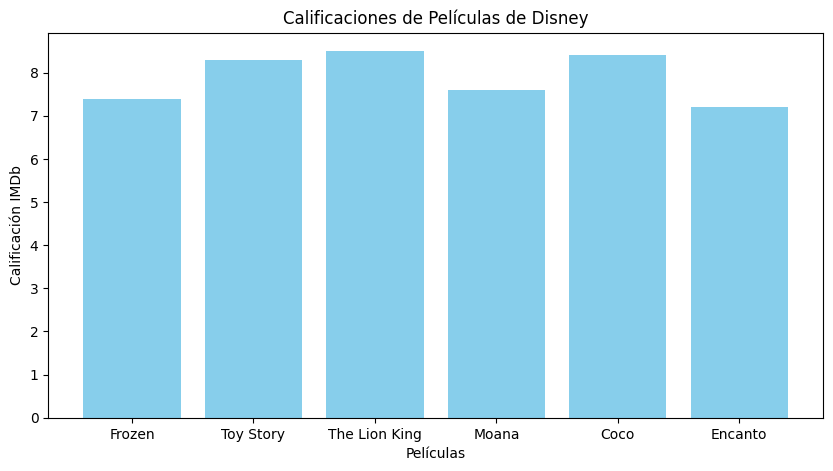

In [18]:
import matplotlib.pyplot as plt # también un alias ampliamente usado

plt.figure(figsize=(10,5))
plt.bar(df_peliculas['Título'], df_peliculas['Calificación'], color='skyblue')
plt.title('Calificaciones de Películas de Disney')
plt.xlabel('Películas')
plt.ylabel('Calificación IMDb')
plt.show()

# Combinación de varios Dataframes

Supongamos que tenemos información financiera adicional de nuestras películas de Disney, como el presupuesto y la recaudación en taquilla. Crearemos un nuevo _DataFrame_ con esta información.

Veremos la potencia de utilizar otra forma de concatenar `.join`: Para poder utilizar `.join`, necesitamos que ambos _DataFrames_ tengan el mismo índice. Por lo tanto, estableceremos `'Título'` como índice en nuestro _DataFrame_ original `df_peliculas`.

Podemos realizar una visualización interesante. Por ejemplo, podemos crear un gráfico de dispersión que muestre la relación entre el presupuesto y la recaudación en taquilla de las películas.

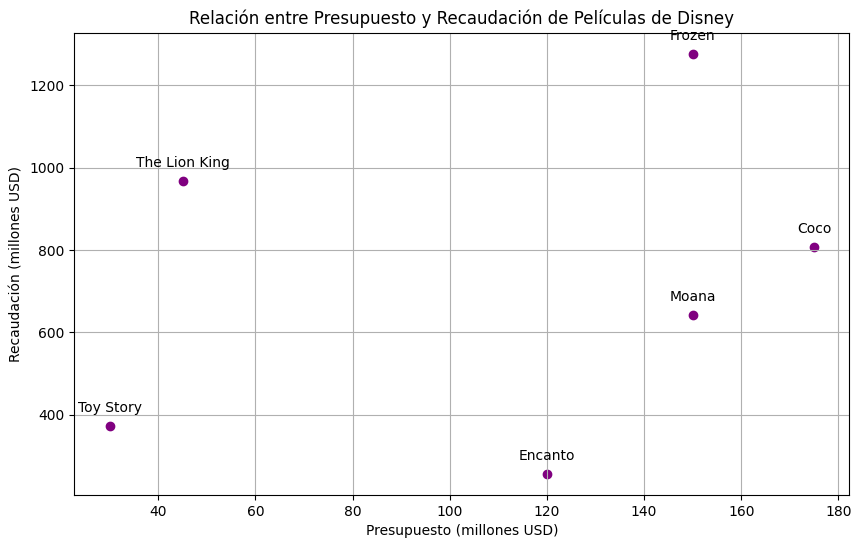

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos originales de películas que trabajamos anteriormente
datos_peliculas = {
    'Título': ['Frozen', 'Toy Story', 'The Lion King', 'Moana', 'Coco', 'Encanto'],
    'Año': [2013, 1995, 1994, 2016, 2017, 2021],
    'Género': ['Animación'] * 6,
    'Duración': [102, 81, 88, 107, 105, 102],
    'Calificación': [7.4, 8.3, 8.5, 7.6, 8.4, 7.2]
}
df_peliculas = pd.DataFrame(datos_peliculas)
df_peliculas['Calificación Ajustada'] = df_peliculas['Calificación'] * 10

# Datos nuevos sobre los datos financieros de estas películas
datos_financieros = {
    'Título': ['Frozen', 'Toy Story', 'The Lion King', 'Moana', 'Coco', 'Encanto'],
    'Presupuesto (millones USD)': [150, 30, 45, 150, 175, 120],
    'Recaudación (millones USD)': [1276.5, 373.6, 968.5, 643.3, 807.1, 256.8]
}
df_finanzas = pd.DataFrame(datos_financieros)

# Estableceremos 'Título' como índice en ambos DataFrames, para generar la consistencia al unir
df_peliculas.set_index('Título', inplace=True)
df_finanzas.set_index('Título', inplace=True)

# Finalmente unimos ambos DataFrames
df_completo = df_peliculas.join(df_finanzas)

# Visualizaremos la unión y las relaciones mediante matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df_completo['Presupuesto (millones USD)'], df_completo['Recaudación (millones USD)'], color='purple')
plt.title('Relación entre Presupuesto y Recaudación de Películas de Disney')
plt.xlabel('Presupuesto (millones USD)')
plt.ylabel('Recaudación (millones USD)')

for idx, row in df_completo.iterrows():
    plt.annotate(idx, (row['Presupuesto (millones USD)'], row['Recaudación (millones USD)']), textcoords="offset points", xytext=(0,10), ha='center')

plt.grid(True)
plt.show()

# Guardar y abrir datos como CSV

Para finalizar, aprenderemos cómo guardar nuestro _DataFrame_ en un archivo CSV y cómo cargar datos desde un archivo CSV utilizando `Pandas`. Esto es esencial para almacenar tus datos y reutilizarlos en futuros análisis sin tener que recrearlos desde cero.

**Guardar en un archivo CSV**

El método `to_csv()` de `Pandas` te permite guardar un _DataFrame_ en un archivo CSV de manera sencilla. (Ten en cuenta que la siguiente línea de código modificará tus archivos).

**Cargar datos desde un archivo CSV**

Para cargar datos desde un archivo CSV y crear un _DataFrame_, utilizamos el método `pd.read_csv()`.

In [20]:
df_peliculas.to_csv('peliculas_disney.csv', index=False)

In [21]:
df_cargado = pd.read_csv('peliculas_disney.csv')

df_cargado

,Año,Género,Duración,Calificación,Calificación Ajustada
0,2013,Animación,102,7.4,74.0
1,1995,Animación,81,8.3,83.0
2,1994,Animación,88,8.5,85.0
3,2016,Animación,107,7.6,76.0
4,2017,Animación,105,8.4,84.0
5,2021,Animación,102,7.2,72.0
